In [1]:
# Simple Stock Market Predictor
# Built with Python 3.5

import csv
import numpy as np
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import math
import time

In [2]:
df = pd.read_csv('ge.csv')
print(df.head())

        Date   Open   High    Low  Close    Volume
0  27-Jan-17  30.40  30.44  29.94  30.01  30005629
1  26-Jan-17  30.44  30.49  30.13  30.32  26767132
2  25-Jan-17  30.42  30.47  30.22  30.37  38131702
3  24-Jan-17  29.86  30.06  29.82  30.00  33686501
4  23-Jan-17  30.50  30.51  29.58  29.75  59093385


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D4B9182B70>,
      dtype=object)

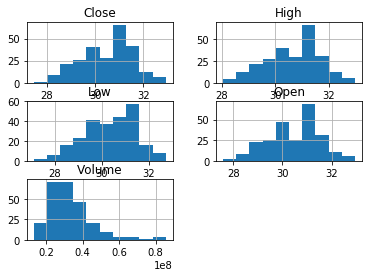

In [3]:
df.hist()

In [4]:
df['OC_Change']=(df['Close']-df['Open'])/df['Open']*100
df['HL_Change']=(df['High']-df['Low'])/df['High']*100
forecast_out= int(math.ceil(1))
df['Label']=df['Close'].shift(-forecast_out)
df=df[['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'OC_Change', 'HL_Change','Label']]
print(df.tail())

         Date   Open   High    Low  Close    Volume  OC_Change  HL_Change  \
245  8-Feb-16  28.22  28.27  27.76  28.17  47343080  -0.177179   1.804033   
246  5-Feb-16  29.15  29.20  28.30  28.54  51732948  -2.092624   3.082192   
247  4-Feb-16  28.65  29.46  28.49  29.18  53809002   1.849913   3.292600   
248  3-Feb-16  28.39  28.69  27.87  28.67  44163305   0.986263   2.858139   
249  2-Feb-16  28.27  28.29  27.92  28.24  39975038  -0.106120   1.307883   

     Label  
245  28.54  
246  29.18  
247  28.67  
248  28.24  
249    NaN  


In [7]:
df.dropna(inplace=True)
print(df.tail())

         Date   Open   High    Low  Close    Volume  OC_Change  HL_Change  \
244  9-Feb-16  27.75  28.54  27.75  28.28  36570398   1.909910   2.768045   
245  8-Feb-16  28.22  28.27  27.76  28.17  47343080  -0.177179   1.804033   
246  5-Feb-16  29.15  29.20  28.30  28.54  51732948  -2.092624   3.082192   
247  4-Feb-16  28.65  29.46  28.49  29.18  53809002   1.849913   3.292600   
248  3-Feb-16  28.39  28.69  27.87  28.67  44163305   0.986263   2.858139   

     Label  
244  28.17  
245  28.54  
246  29.18  
247  28.67  
248  28.24  


In [8]:
testDataSet=df.drop(['Date'],1)
X=np.array(testDataSet.drop(['Label'],1))
y=np.array(testDataSet['Label'])
print("Length of X 7 y: ", len(X), len(y))

Length of X 7 y:  249 249


In [9]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2)
print("Length of X_train & y_train: ",len(X_train), len(y_train))

Length of X_train & y_train:  199 199


In [10]:
clf=SVR()
clf.fit(X_train, y_train)
accuracySVM=clf.score(X_test, y_test)
print("Accuracy by using SVM is : ",accuracySVM)

Accuracy for SVM is :  -3.9132532628771706e-05


In [11]:
clfLinearReg=LinearRegression()
clfLinearReg.fit(X_train, y_train)
accuracyLR=clfLinearReg.score(X_test, y_test)
print("Accuracy by using LinerRegression is : ",accuracyLR)

Accuracy for LinerRegression is :  0.9510348542543922
